# QRT ENS Challenge Data 2023 - Benchmark

Ce notebook détaille la construction du benchmark de ce challenge - il peut également être utile aux participants pour se lancer dans la compétition. 

## Librairies

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

- `X_train` et `X_test` ont  $35$ colonnes qui représentent les même variables explicatives mais sur des périodes de temps différentes. 

- `X_train` et `Y_train` partagent la même colonne `ID` - chaque ligne a un ID unique associé à un jour et à un pays. 

- La variable cible `TARGET` de `Y_train` correspond à la variation de prix journalière des futures sur l'électricité (maturité 24h).

- **On notera que certaines colonnes ont des valeurs manquantes**.


In [3]:
import os

data_path = os.path.join('data')

In [3]:
print(os.getcwd())

d:\Utilisateur\Documents\Formation\Quant\Challenge_Data_QRT


In [4]:
# After downloading the X_train/X_test/Y_train .csv files in your working directory:
X_train_path = os.path.join(data_path, 'X_train.csv')
Y_train_path = os.path.join(data_path, 'y_train.csv')
X_test_path = os.path.join(data_path, 'X_test.csv')

X_train = pd.read_csv(X_train_path)
Y_train = pd.read_csv(Y_train_path)
X_test = pd.read_csv(X_test_path)

In [5]:
X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [6]:
Y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


## Modèles et score d'entrainement

Le benchmark pour ce challenge consiste en une simple régression linéaire, après un léger nettoyage des données : Les valeurs manquantes (NaN) ont été remplacées par des zéros et la colonne `COUNTRY` a été supprimée - en d'autres termes, nous avons utilisé un modèle identique pour la France et l'Allemagne.

In [5]:
lr = LinearRegression()

X_train_clean = X_train.drop(['COUNTRY'], axis=1).fillna(0)
Y_train_clean = Y_train['TARGET']

lr.fit(X_train_clean, Y_train_clean)

output_train = lr.predict(X_train_clean)

def metric_train(output):

    return  spearmanr(output, Y_train_clean).correlation

print("Corrélation (Spearman) pour les données d'entrainement : {:.1f}%".format(100 * metric_train(output_train) ))

Corrélation (Spearman) pour les données d'entrainement : 27.9%


La corrélation de Spearman obtenue avec notre modèle sur les données d'entrainement est d'environ 27.9%.

NB : Les variations du prix de l'électricité peuvent être très volatiles et c'est pour cette raison que nous avons préféré la corrélation de Spearman à la corrélation usuelle (Pearson), pour avoir une fonction de score plus robuste.

## Générer le benchmark

Pour générer le benchmark on procède comme on l'a fait avec les données d'entrainement mais cette fois sur les données test, et on renvoie la sortie au format csv adapté aux contraintes des sorties du challenge.  


In [8]:
X_test.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1115,241,FR,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,...,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256
1,1202,1214,FR,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,...,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086
2,1194,1047,FR,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,...,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747
3,1084,1139,FR,0.172555,-0.723427,-0.044539,0.044539,NaN,-0.205276,NaN,...,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069
4,1135,842,FR,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,...,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341


In [6]:
X_test_clean = X_test.drop(['COUNTRY'], axis=1).fillna(0)

Y_test_submission = X_test[['ID']].copy()
Y_test_submission['TARGET'] = lr.predict(X_test_clean)

Y_test_submission.to_csv(os.path.join(data_path,'benchmark_qrt.csv'), index=False)


On soumet alors le fichier benchmark_qrt.csv sur la site du challenge https://challengedata.ens.fr, et on obtient alors une corrélation d'environ 15.9 % - c'est le score à battre!


## Astuces et idées d'amélioration

- Réféchir à la modélation des différents facteurs qui font bouger les prix de l'électricité dans chaque pays pourra être utile. 

- Le jeu de données est relativement petit - c'est un "small data challenge" - alors attention à ne pas surapprendre les paramètres de vos modèles ! Il sera certainement utile de mettre en place de bonnes pratiques de validation croisée.


## Améliorations

In [7]:
# Check for missing values
print(X_train.isnull().sum())
print(Y_train.isnull().sum())

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
dtype: int64
ID        0
TARGET    0
dtype: int64


In [8]:
# handle missing values
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train = X_train[numerical_columns].fillna(X_train[numerical_columns].mean())
X_test = X_test[numerical_columns].fillna(X_test[numerical_columns].mean())

categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)

In [9]:
print(X_train.isnull().sum().sum())
print(Y_train.isnull().sum().sum())

0
0


                ID       DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  \
count  1494.000000  1494.000000     1494.000000     1494.000000   
mean   1072.759036   591.861446        0.427442       -0.020032   
std     618.013179   345.065043        0.673412        0.918995   
min       0.000000     0.000000       -2.265563       -1.462350   
25%     540.250000   292.250000       -0.037421       -0.716771   
50%    1077.500000   591.000000        0.357061       -0.394166   
75%    1597.500000   885.750000        0.922057        0.650533   
max    2146.000000  1215.000000        2.033851        3.300640   

       DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  \
count     1494.000000     1494.000000    1494.000000    1494.000000   
mean        -0.145508        0.145508      -0.256332      -0.072643   
std          0.962068        0.962068       0.916821       1.050307   
min         -2.856874       -2.634831      -2.464849      -2.825331   
25%         -0.869990       -0.631683    

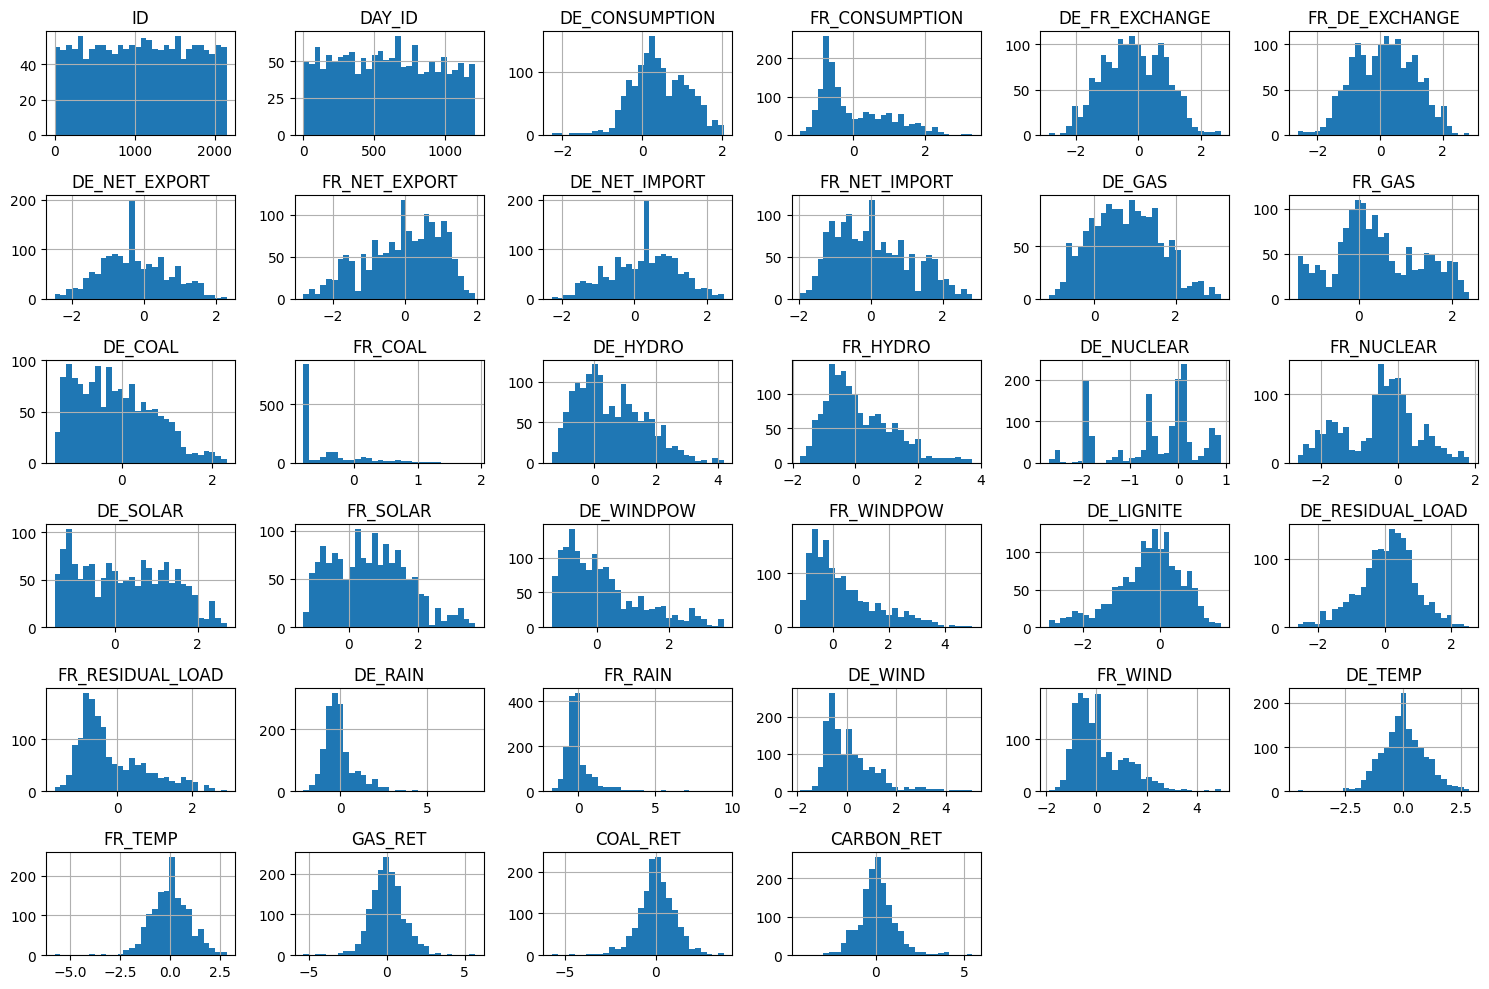

In [10]:
print(X_train.describe())
# Histogram for numerical features
X_train[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [11]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Check for correlation between features and the target variable

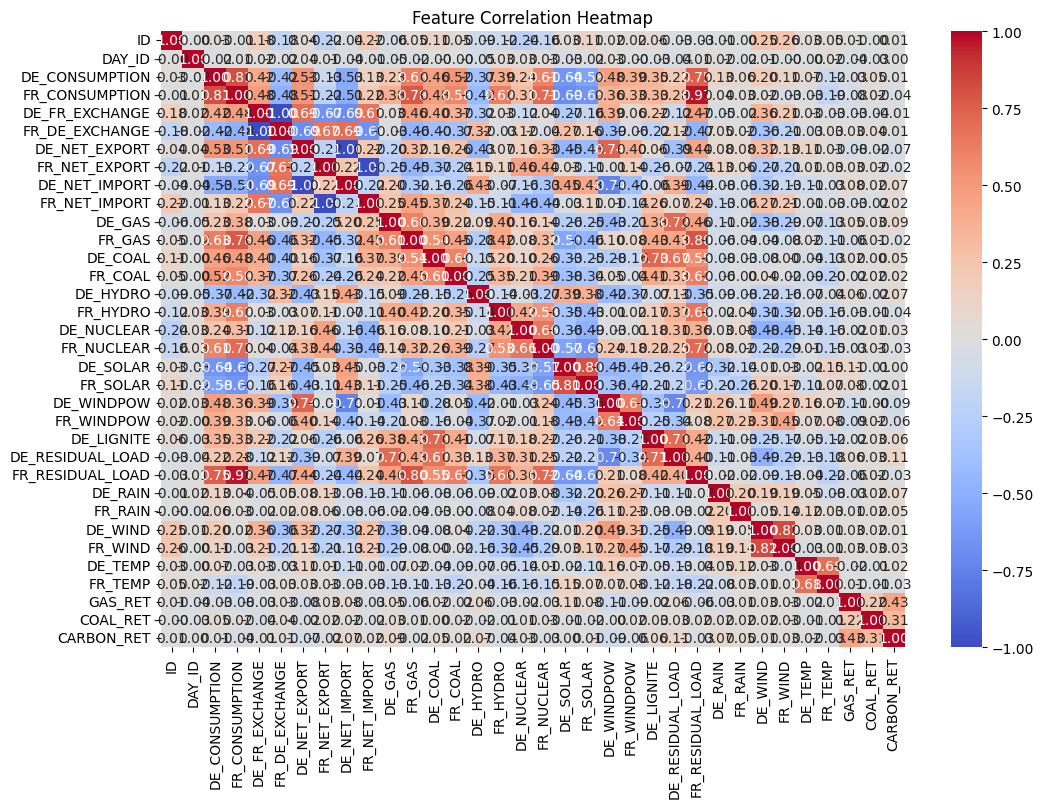

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

,Feature 1,Feature 2,Correlation
0,FR_CONSUMPTION,DE_CONSUMPTION,0.813202
1,FR_DE_EXCHANGE,DE_FR_EXCHANGE,-1.000000
2,DE_NET_EXPORT,DE_CONSUMPTION,0.525679
3,DE_NET_EXPORT,FR_CONSUMPTION,0.512234
4,DE_NET_EXPORT,DE_FR_EXCHANGE,0.689740


selected features: ['FR_WINDPOW', 'FR_CONSUMPTION', 'DE_COAL', 'FR_NET_IMPORT', 'FR_WIND', 'FR_NET_EXPORT', 'FR_TEMP', 'DE_NET_EXPORT', 'DE_SOLAR', 'FR_GAS', 'DE_RESIDUAL_LOAD', 'FR_HYDRO', 'FR_NUCLEAR', 'FR_DE_EXCHANGE', 'FR_RESIDUAL_LOAD', 'DE_NET_IMPORT', 'FR_SOLAR', 'DE_LIGNITE', 'FR_COAL', 'DE_WINDPOW']
Number of selected features: 20


<function matplotlib.pyplot.show(close=None, block=None)>

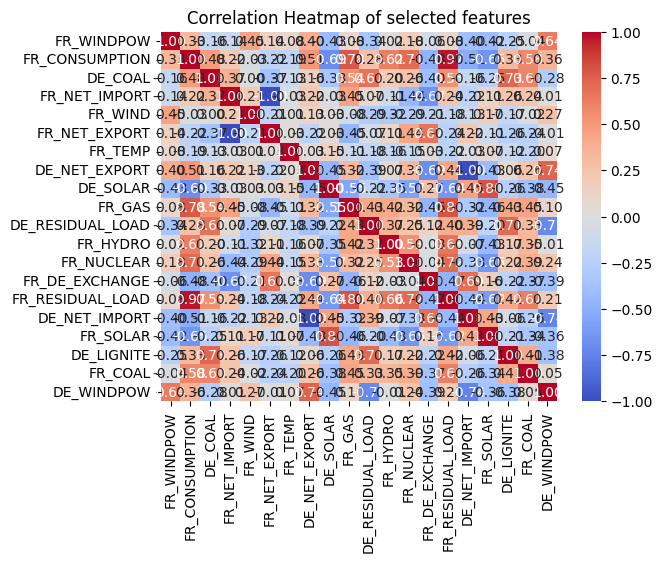

In [26]:
correlation_matrix = X_train.corr()
threshold = 0.5

# Dataframe for highly correlated features
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

highly_correlated_df = pd.DataFrame(highly_correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
display(highly_correlated_df.head())

# Select features for analysis
selected_features = set()
for feature1, feature2, _ in highly_correlated_pairs:
    selected_features.add(feature1)

selected_features = list(selected_features)
print(f"selected features: {selected_features}")
print(f"Number of selected features: {len(selected_features)}")

# Heatmap for these features
sns.heatmap(X_train[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of selected features")
plt.show

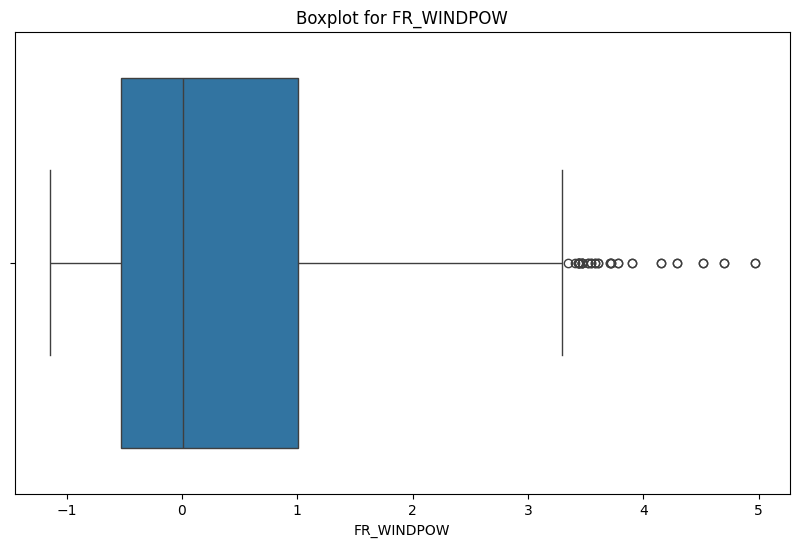

Outliers in FR_WINDPOW:
 [3.34360367 4.51620098 3.57889252 4.15142283 3.89996129 4.29241414
 3.47116518 3.44579347 3.78357834 3.51866113 4.965793   3.5466334
 4.15142283 3.71498459 3.43991093 3.60462218 3.43773732 3.78357834
 3.57889252 3.46579154 3.47116518 3.60462218 3.41227936 3.46579154
 3.71498459 4.29241414 4.51620098 4.70210923 3.43991093 4.70210923
 3.89996129 3.72044448 3.44579347 3.51866113 4.965793   3.5466334
 3.43773732 3.72044448]


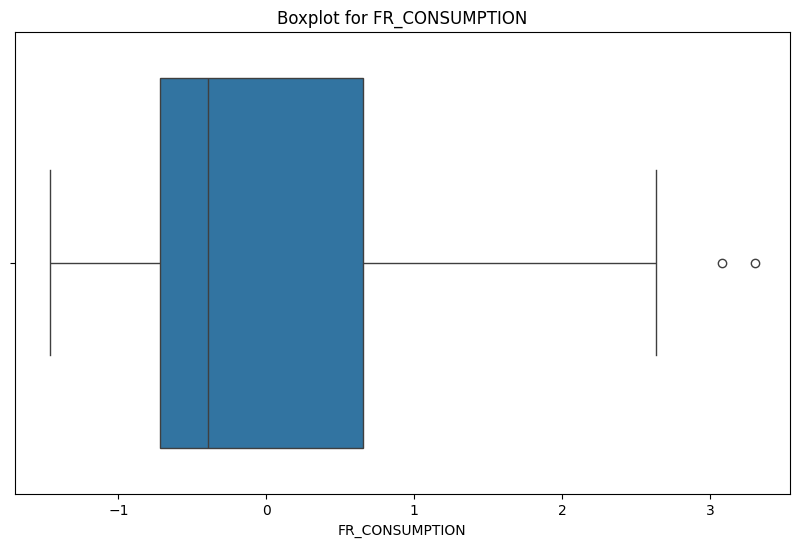

Outliers in FR_CONSUMPTION:
 [3.30064041 3.07917956]


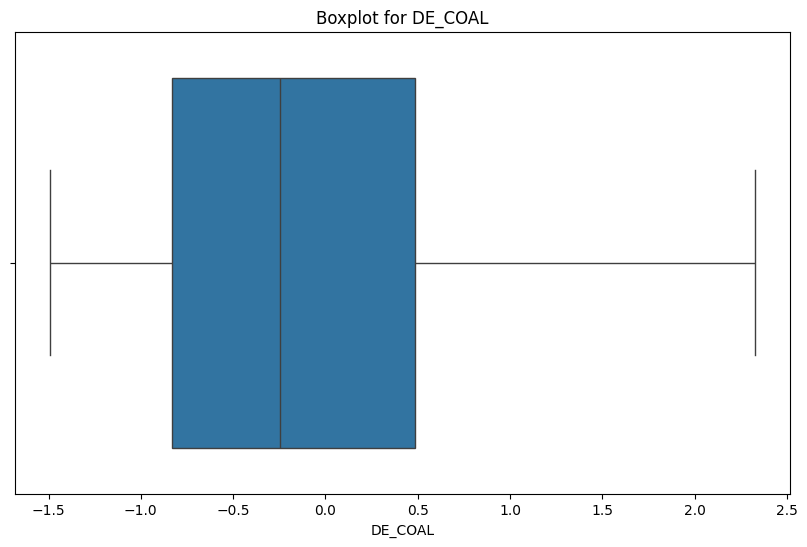

Outliers in DE_COAL:
 []


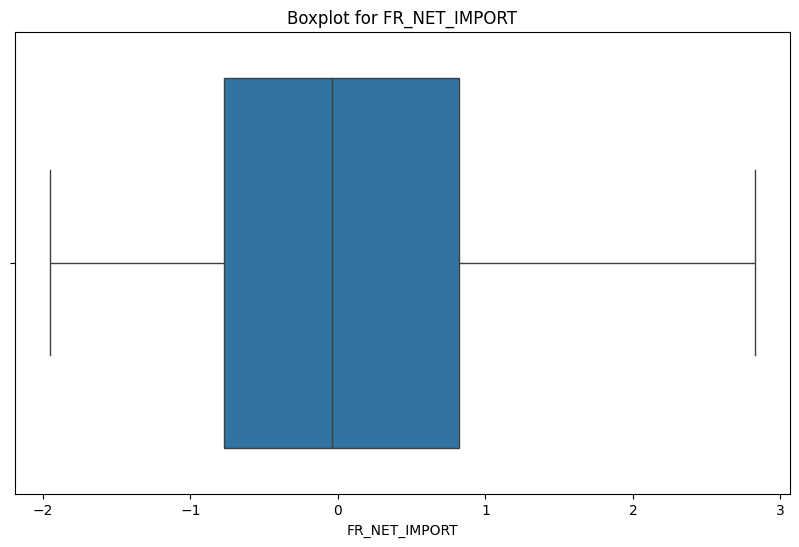

Outliers in FR_NET_IMPORT:
 []


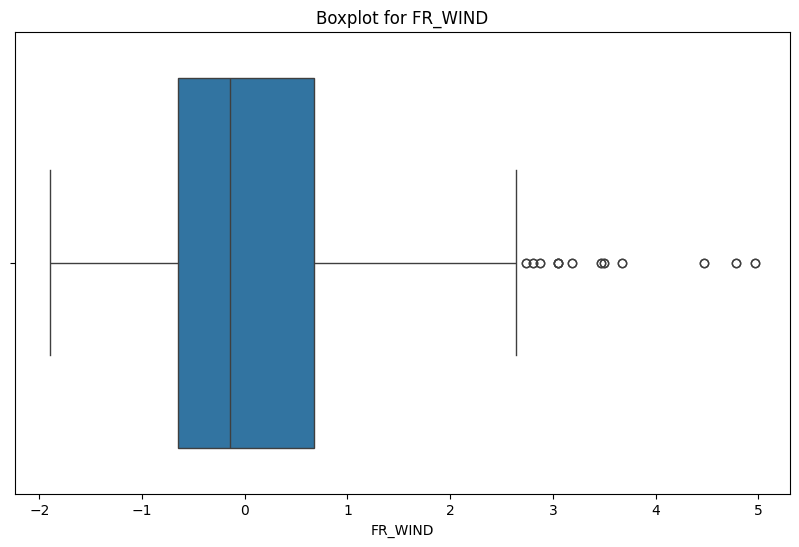

Outliers in FR_WIND:
 [4.96502753 3.0468632  3.47132965 2.81074239 3.04612701 3.66918026
 2.81074239 3.0468632  3.49905977 2.73460636 4.47523064 3.04612701
 3.18831766 2.87627008 2.87627008 3.18831766 3.49905977 4.47523064
 4.96502753 4.78842493 4.78842493 3.47132965 2.73460636 3.66918026]


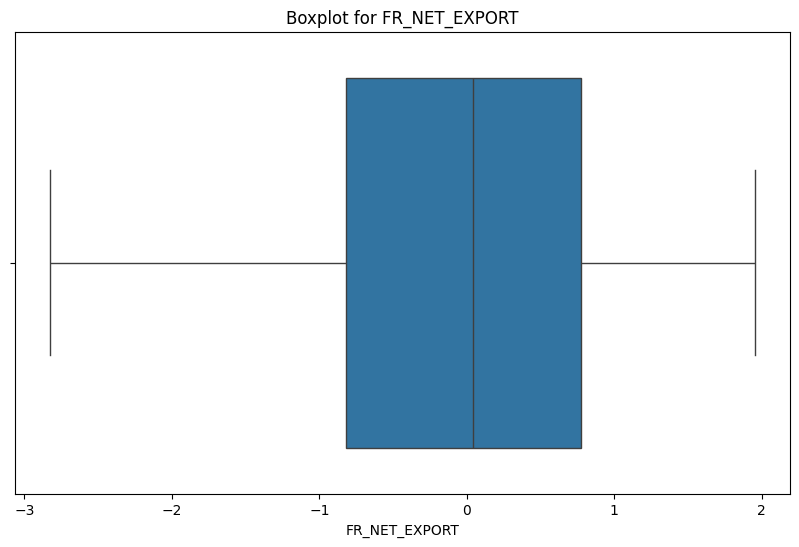

Outliers in FR_NET_EXPORT:
 []


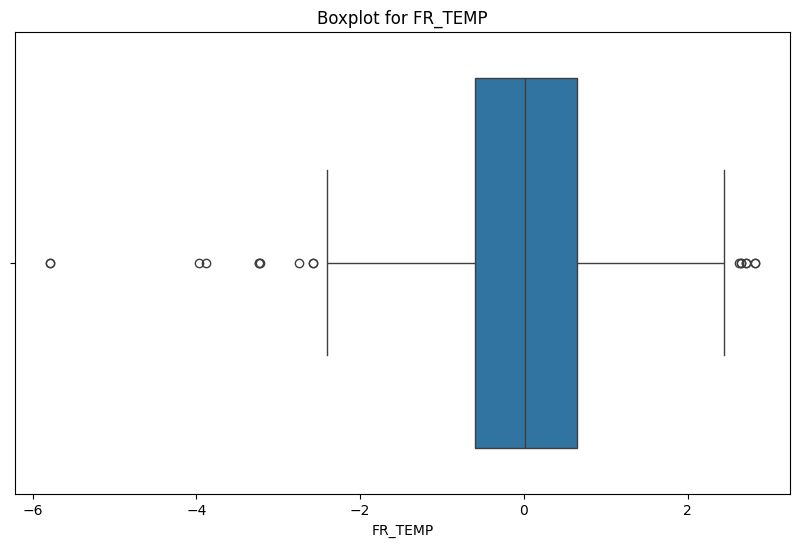

Outliers in FR_TEMP:
 [-3.21761863  2.81723927  2.64899651  2.62574361 -3.23823267  2.81723927
 -5.78709715 -5.78709715  2.7090791   2.7090791  -3.23823267 -2.57039512
 -3.88238645 -2.57039512 -3.96494901  2.64899651 -2.75126676]


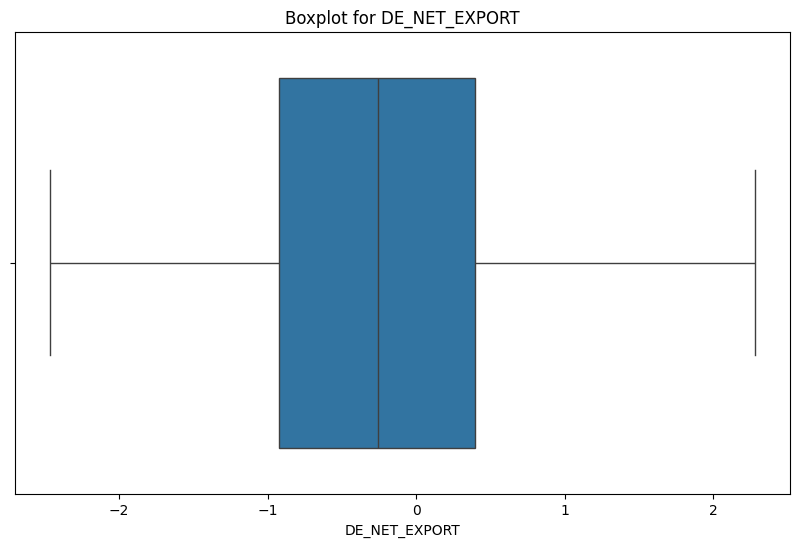

Outliers in DE_NET_EXPORT:
 []


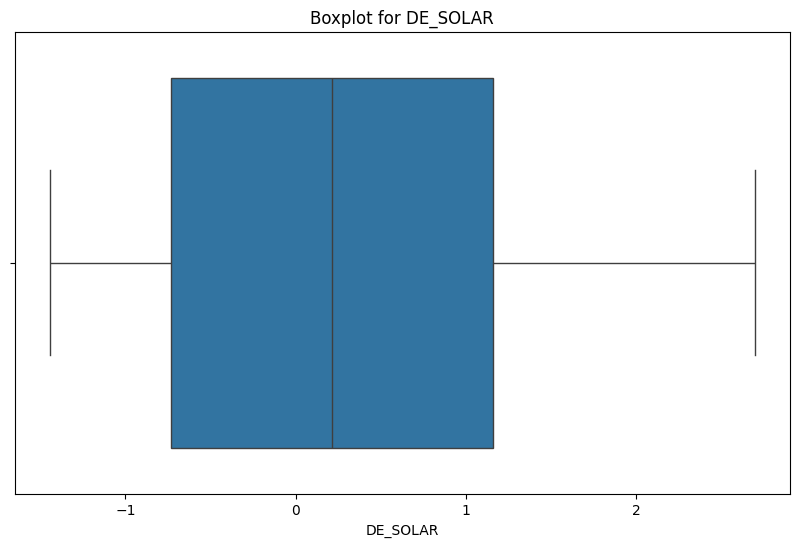

Outliers in DE_SOLAR:
 []


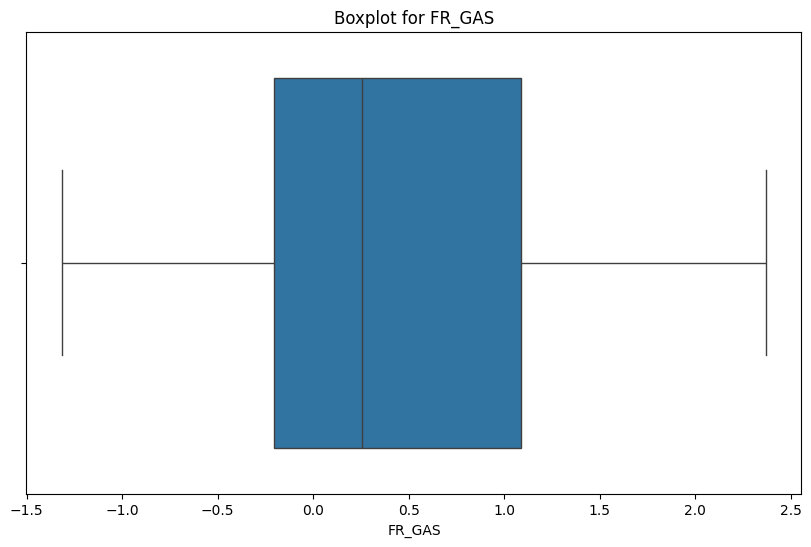

Outliers in FR_GAS:
 []


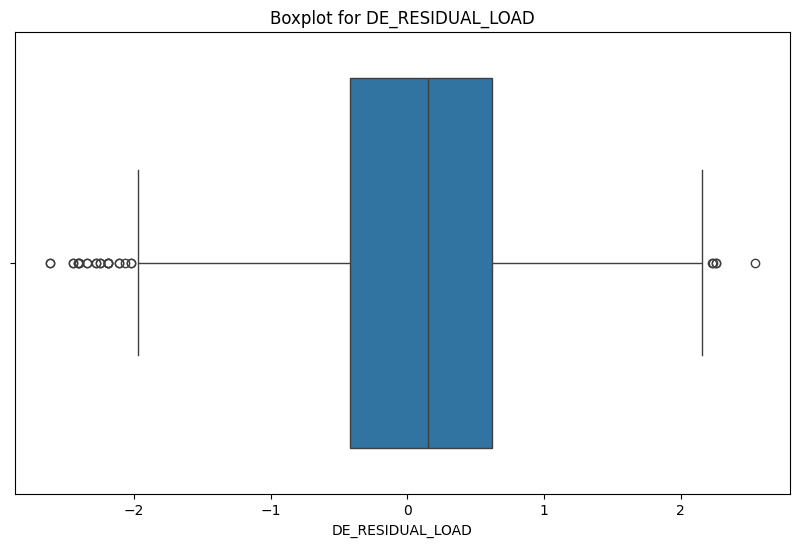

Outliers in DE_RESIDUAL_LOAD:
 [-2.18657232 -2.11000641 -2.44333408 -2.27485878 -2.24923168 -2.11000641
 -2.40988325  2.23239046 -2.40107286  2.22986417 -2.27485878 -2.06295302
  2.25415498 -2.01980578 -2.44333408 -2.61356896 -2.18999501 -2.24923168
 -2.40988325 -2.18657232 -2.34329802  2.25415498 -2.34329802 -2.18999501
 -2.40107286 -2.61356896 -2.01980578  2.53957643]


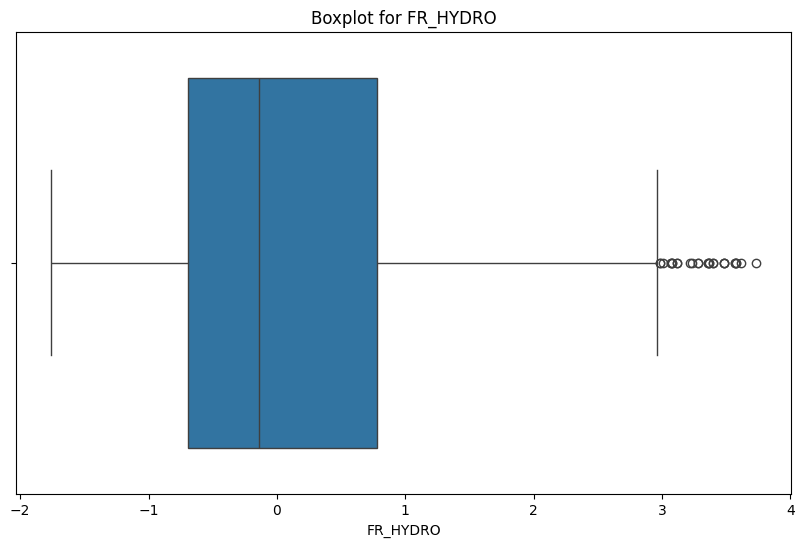

Outliers in FR_HYDRO:
 [3.00709818 3.07008096 3.21873346 3.23538233 3.07008096 3.57055784
 3.57807384 3.11683171 3.3562446  3.57807384 3.48279123 3.39985
 3.36417745 3.48279123 2.98754396 3.73047802 3.11683171 3.3562446
 3.39985    3.61800336 3.28098359 3.57055784 3.07667482 3.48275333
 3.28098359 3.07667482 3.36417745 2.98754396]


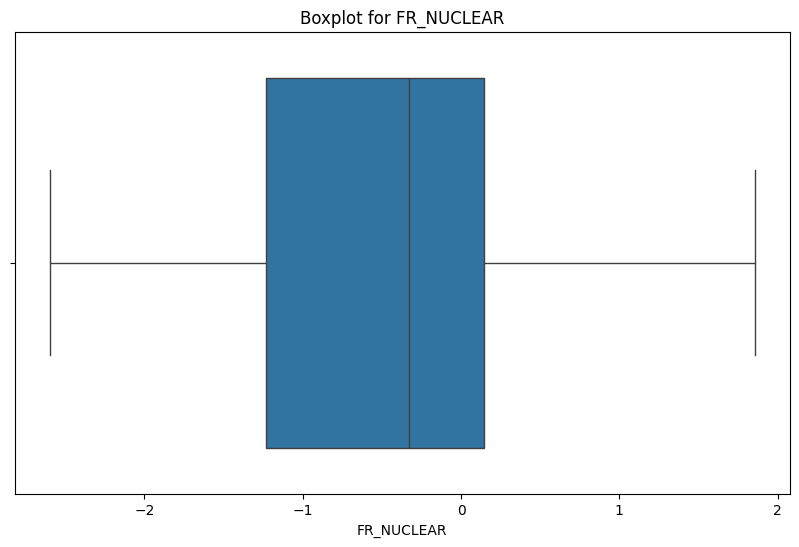

Outliers in FR_NUCLEAR:
 []


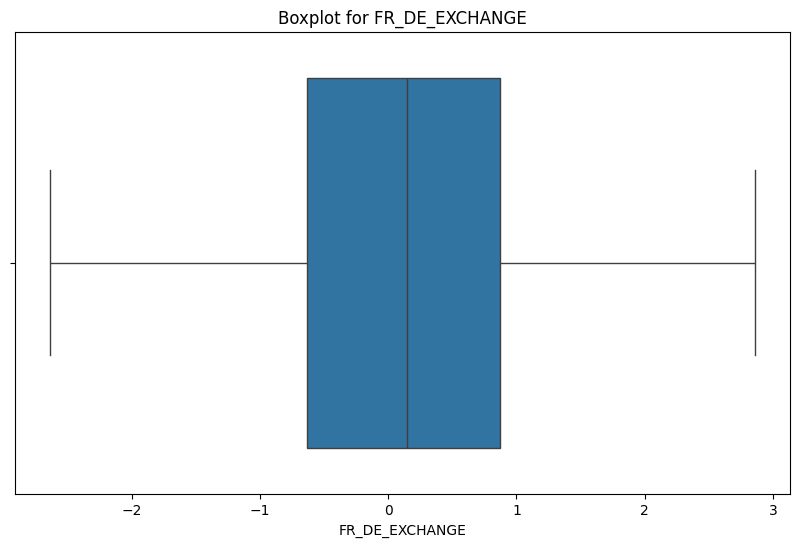

Outliers in FR_DE_EXCHANGE:
 []


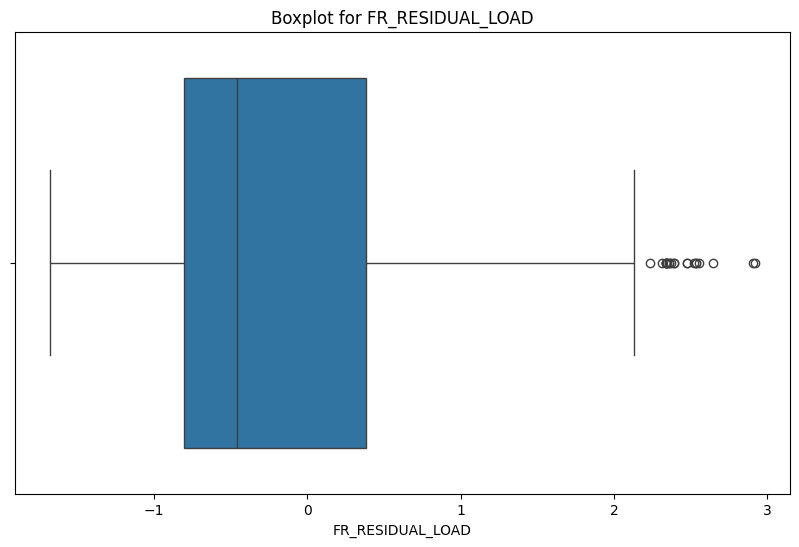

Outliers in FR_RESIDUAL_LOAD:
 [2.47547268 2.47547268 2.35749296 2.39285186 2.34451504 2.52332946
 2.39285186 2.23495571 2.53745382 2.6467703  2.31267075 2.34312575
 2.91015393 2.91832584 2.33959231 2.37238725 2.35749296 2.33959231
 2.53745382 2.34312575 2.55547683]


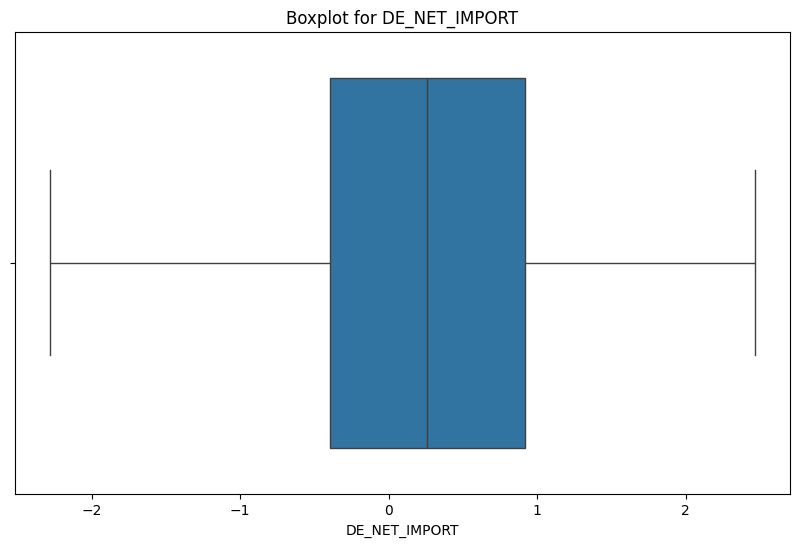

Outliers in DE_NET_IMPORT:
 []


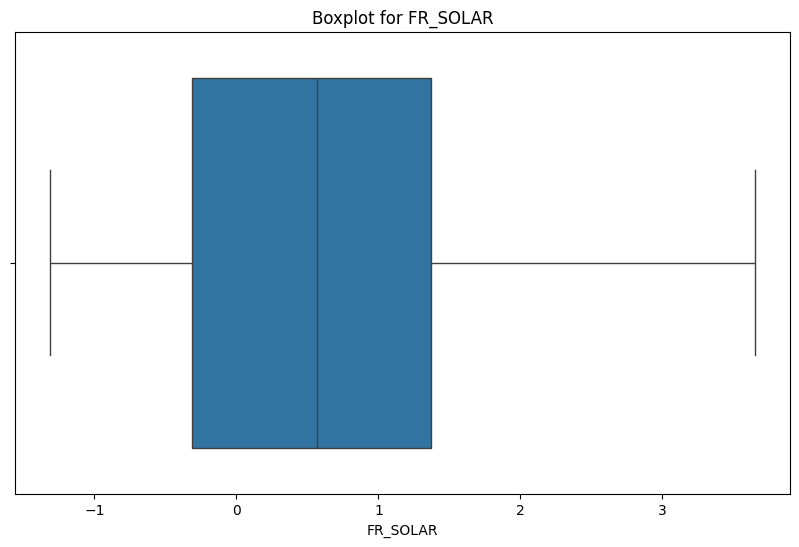

Outliers in FR_SOLAR:
 []


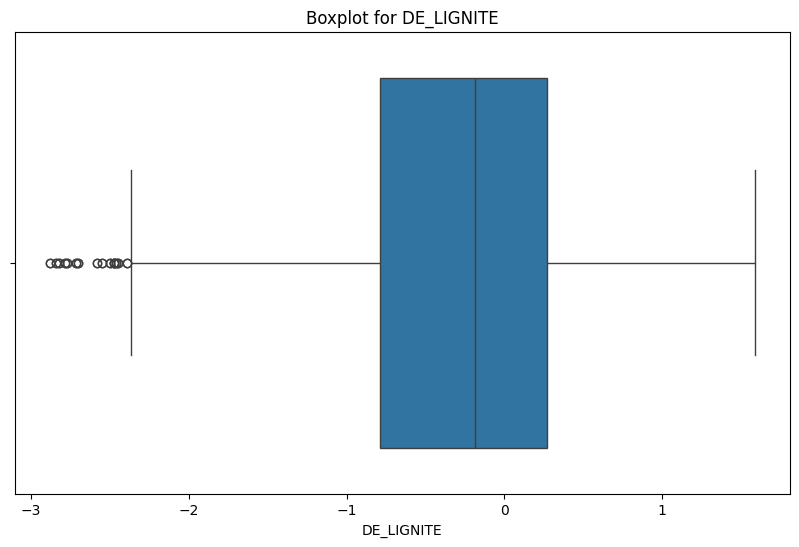

Outliers in DE_LIGNITE:
 [-2.38968286 -2.70147455 -2.55218291 -2.71455996 -2.84376459 -2.87904064
 -2.47632285 -2.44583123 -2.49634993 -2.45950641 -2.78399243 -2.47632285
 -2.77141164 -2.78399243 -2.47386914 -2.55218291 -2.82565506 -2.82565506
 -2.84376459 -2.38968286 -2.49634993 -2.58225822 -2.87904064 -2.71455996
 -2.58225822 -2.45950641 -2.44583123 -2.70147455 -2.77141164 -2.47386914]


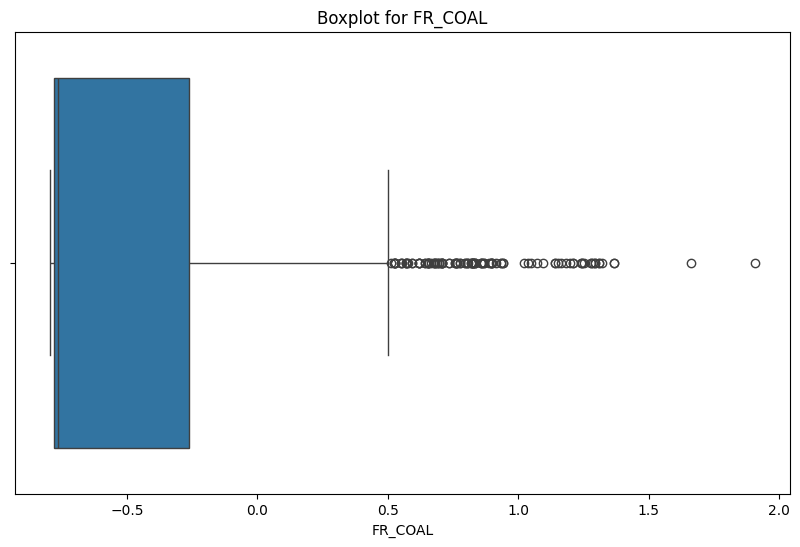

Outliers in FR_COAL:
 [0.77705296 0.85798302 0.76389223 1.19716604 0.69661696 1.15334251
 0.82374621 0.6549168  0.75729085 0.70776994 0.85890805 0.5524166
 0.5710014  0.62021747 0.54869544 0.61803102 0.82625852 0.69661696
 0.67491017 0.67491017 0.61803102 0.86846324 0.68838625 1.30931603
 1.04643789 0.83246046 1.23872955 0.52563263 0.80712711 0.79616334
 0.88705855 1.662301   0.68859648 0.82771965 0.76085433 0.70786454
 0.51279777 0.93163893 0.93998527 0.54869544 0.64057875 0.75729085
 1.2933802  0.85798302 0.66593312 1.2933802  0.85890805 0.52225836
 0.81826958 0.89390171 1.27778075 0.65206811 0.57837014 1.14023434
 1.20999039 1.16331817 0.57096986 0.76389223 0.6549168  0.82625852
 1.09353058 0.83188231 1.2430604  0.93163893 1.27778075 1.0725491
 0.76085433 0.83246046 0.52225836 0.81826958 0.64057875 1.36558549
 1.28424548 0.68084931 0.70776994 0.59120501 0.93998527 0.73398627
 0.5710014  1.03836485 0.70786454 0.62021747 0.77705296 1.25125957
 0.52834467 1.30931603 0.89885275 0.591205

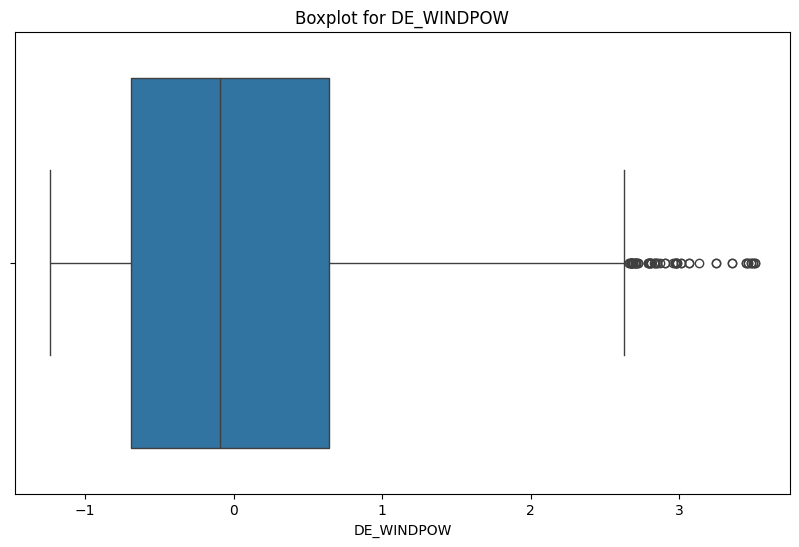

Outliers in DE_WINDPOW:
 [2.95729147 3.49953009 2.7051464  2.6635887  2.67443298 2.69051899
 2.83748394 2.67764237 2.67634111 2.6635887  3.45373855 2.67443298
 3.13315162 3.01087641 3.06468257 3.5090175  2.69051899 2.96971975
 2.80219953 2.83748394 2.98033098 3.46408834 2.84883334 3.35417634
 2.79519162 2.9036462  3.25046428 2.79065967 2.70888813 2.79065967
 3.01087641 2.96971975 3.06468257 3.25046428 2.67634111 2.98853132
 2.68634902 2.83292478 2.79519162 2.70512865 2.9036462  3.45373855
 2.80219953 3.49953009 3.35417634 3.48525638 2.71017047 2.70888813
 2.84883334 3.48525638 2.98853132 2.67764237 2.81442433 2.98033098
 3.5090175  2.72078288 2.8727861  3.46408834 2.68634902 2.72078288
 2.81442433 2.70512865]


In [31]:
# identify outliers
outlier_dict = {}

for col in selected_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

    # Calculate Q1, Q3 and IQR
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = X_train[(X_train[col]<lower_bound) | (X_train[col]>upper_bound)]
    outlier_dict[col] = outliers[col]

    print(f"Outliers in {col}:\n {outliers[col].values}")

We can either remove outliers, cap them at the boundary values or transform them with methods like log transformation or Winsorization


Outliers can represent exceptional prices, rare weather condition etc. We chose to not remove them and cap them to boundary values

In [32]:
# Capping outliers for each column
for col in selected_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)
